# MA124 Maths by Computer: Assignment 3 
## Part A: Monte Carlo Integration

Student number:2109968

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

We consider the integral

$$
\int_a^b f(x) \, dx
$$

where $f(x) = -\sin(x)/x$, $a=\pi$ and $b = 4\pi$. Since $\sin(x)/x$ does not have an elementary antiderivative we must use numerical methods to evaluate this integral.

First we use Monte Carlo to estimate $\bar f$, the mean value of $f$ over the interval $[a,b]$. From this estimate the integral. 
We use $10^6$ samples to get a reasonably accurate estimate of $\bar f$ and from this an estimate for the integral. We then Report the value of the integral and produce a plot showing $y = f(x)$ and a rectangular box $[a,b] \times [0,\bar f]$.


In [2]:
# define the function to integrate
def my_fun(x):
    return -np.sin(x)/x

def Indicator(x, y):
    # Indicator functions that returns 
    #  1 if (x,y) is bounded by the curve and x axis and positive
    #  0 if (x,y) is not
    #  -1 if (x,y) is bounded by the curve and x axis and negative
    
    if y<=my_fun(x) and y>=0:
        r=1
    elif y>=my_fun(x) and y<=0:
        r=-1
    else:
        r=0
        
    return r
# define colour function based on indicator
def my_RGB(x, y):
    R,G,B=0,0,0
    if Indicator(x, y)==1:   
        R = 0
        G = 1
        B = 0.2
    elif Indicator(x, y)==-1:
        R = 1
        G = 0.2
        B = 0
    else:
        R = 0
        G = 0.2
        B = 1
        
    return R, G, B

the Monte Carlo estimate for the integral is 0.3585496480986623


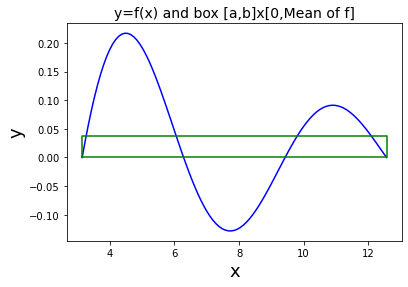

In [11]:
# set the interval [a,b] and the number of samples
a, b = np.pi, 4*np.pi
N1 = 10**6

# generate the samples and evaluate f at each 
x1 = np.random.uniform(a, b, N1)
f_of_x = my_fun(x1)

# compute the mean and estimate the integral
f_mean = np.mean(f_of_x)
my_integral = (b-a) * f_mean
print("the Monte Carlo estimate for the integral is", my_integral)

# Plots
x_plot = np.linspace(a, b, 101)
y_plot = my_fun(x_plot)
plt.plot(x_plot ,y_plot, 'b')
plt.plot([a,b,b,a,a],[0,0,f_mean, f_mean,0], 'g')
plt.title('y=f(x) and box [a,b]x[0,Mean of f]',fontsize=14)
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.show()

Secondly, 
$$
\int_a^b f(x) \, dx = \text{signed area under the curve}
$$

where "signed under the curve" means the area between the curve $y = f(x)$ and the x axis, taking care of positive and negative contributions to the integral. We use Monte Carlo to estimate the integral by estimating areas.

We have computed Monte Carlo samples in a rectangular region $[a,b] \times [-0.15, 0.25]$. The graph partitions the rectangle into three types of regions with coloured sample points - those that contribute positively to the integral in $\color{green}{\text{green}}$, those that contributed negatively to the integral in $\color{red}{\text{red}}$, and those that do not contribute in $\color{blue}{\text{blue}}$. From the areas, we have estimated the integral and reported the value. We have used a sample size of $N=2000$ and produced a plot showing the Monte Carlo points coloured according to the type of region they are in.

We follow this by a square showing the average colour of the Monte Carlo sample points.

The area of the region is 0.3374070509955438


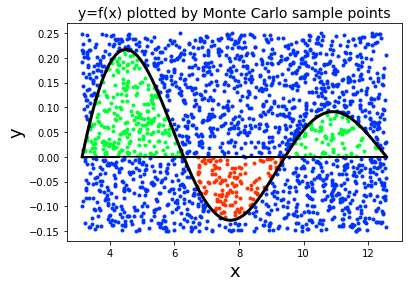

In [12]:
# Compute the area of a 2D region defined by an indicator function
# by using the Monte Carlo method

# generate N uniform random points in [x_min, x_max]x[y_min, y_max]
N = 2000
x_min, x_max = a, b
y_min, y_max = -0.15, 0.25

xa = np.random.uniform(x_min, x_max, N)
ya = np.random.uniform(y_min, y_max, N)

# add up the total number within the region
total = 0
R1=0
G1=0
B1=0
Rtotal=0
Gtotal=0
Btotal=0
for i in range(N):
    total += Indicator(xa[i], ya[i])
    R1,G1,B1 = my_RGB(xa[i],ya[i])
    plt.plot(xa[i], ya[i], '.', color=(R1,G1,B1))
    #Calculate overall number of red, green and blueness 
    Rtotal+=R1
    Gtotal+=G1
    Btotal+=B1
    
AvColour=(Rtotal/N,Gtotal/N,Btotal/N)

# obtain the area
rectangle_area = (x_max-x_min)*(y_max-y_min)
region_area = rectangle_area * total/N

# Plots
print("The area of the region is", region_area)
x_plot = np.linspace(a, b, 101)
y_plot = my_fun(x_plot)
plt.plot(x_plot ,y_plot, 'k',linewidth=3)
plt.plot(xa,np.zeros(N),'k')
plt.title('y=f(x) plotted by Monte Carlo sample points',fontsize=14)
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.show()

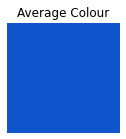

In [5]:
# plot a square with the mean colour
plt.figure(figsize=(2,2))
plt.plot(0.5, 0.5, 's', markersize=300, color = (AvColour))
plt.axis('off')
plt.title("Average Colour")
plt.show()